# Basic DESI stuff

In [22]:
import desitarget 
from astropy.table import Table # astropy Table to import and view data; join, np.hstack, np.vstack useful
import numpy as np

import matplotlib.pyplot as plt

In [5]:
desitarget.__file__ #where does the python package exist

'/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/code/desitarget/2.4.0/lib/python3.9/site-packages/desitarget/__init__.py'

In [6]:
desitarget.__version__

'2.4.0'

In [7]:
! ls #! executes a command line command

 comparison	   'files for mkCat_main.ipynb'    README.md
 DA0.2		   'footprint (Alex'\''s).ipynb'   sky_coverage_plots.ipynb
 DA1.0		   'getting started.ipynb'	   SV3
 desi_plots.ipynb   plotting.py			   vol_lim_samples.py
 fastphot.ipynb     powerlaw.py			   zs
 figures	    __pycache__


In [8]:
! echo $DESI_ROOT # echo is print, $ is a bash variable

/global/cfs/cdirs/desi


In [9]:
! ls /global/cfs/cdirs/desi/spectro/redux
#releases of desi data names after mountains, fuji until end of SV, guadalupe main survey data
# https://desi.lbl.gov/trac/wiki/Pipeline/Releases

23.6		      i2			      oldbias
alpha-3		      ioannis			      old_tiles_314_315
alxogm		      iron			      p1
andes		      jguy			      pdaily
backup-daily	      jguy2			      pine_214ae69
bgs-specsim-paper-kr  jguy-adjust-sky-line-amplitude  plawton
blanc		      jguy-main			      prodruntest
bolton		      jguy-skycorr		      psfnight
cascades	      jguy-skycorr2		      ptest
cpugpu-cknl	      jguy-skysub-fix		      QL
ctest		      jguy-tile-qa		      README.html
daily		      jiaxi			      rstaten
daily2		      jlasker			      rthomas
daily_manager_test    jratajcz			      schlafly
dailytest	      koposov			      sgontcho_skyfibers
dataqa-tutorial       kremin			      sjb
dc3c		      kremin_daily		      sjbailey
debug		      kremin_test		      sky
deep-fuji	      m31testing		      sky_traceshift
desi		      malvarez			      skyvarissue
dither		      martini			      srheft
dmargala	      minicascades		      stdstar
elm		      minisv0			      stephey
example		      minisv0a			      test


In [10]:
! ls /global/cfs/cdirs/desi/spectro/redux/guadalupe
#exposures - raw data
#tiles - what order we observed, etc, info on conditions for that part of sky
#zcatalog ! - redshifts

calibnight		  healpix		     run
exposures		  inventory-guadalupe.txt    tiles
exposures-guadalupe.csv   preproc		     tiles-guadalupe.csv
exposures-guadalupe.fits  processing_tables	     tiles-guadalupe.fits
exposure_tables		  redux_guadalupe.sha256sum  zcatalog


In [11]:
! ls /global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog
#zall - combination of everything
#zpix - split up by healpixel
#    healpixel - celestial sphere broken into chunks. NSIDE - resolution (how many chunks)
#    if split up into healpixel, need to collect them - glob, wildcard (*) - filelist = glob.glob


redux_guadalupe_zcatalog.sha256sum  ztile-main-dark-cumulative.fits
zall-pix-guadalupe.fits		    ztile-main-dark-perexp.fits
zall-tilecumulative-guadalupe.fits  ztile-main-dark-pernight.fits
zpix-main-bright.fits		    ztile-special-bright-cumulative.fits
zpix-main-dark.fits		    ztile-special-bright-perexp.fits
zpix-special-bright.fits	    ztile-special-bright-pernight.fits
zpix-special-dark.fits		    ztile-special-dark-cumulative.fits
ztile-main-bright-cumulative.fits   ztile-special-dark-perexp.fits
ztile-main-bright-perexp.fits	    ztile-special-dark-pernight.fits
ztile-main-bright-pernight.fits


# Basic DESI plots

Data is in form of fits files, easiest way I've found is using astropy.table but there are others

Also see this tutorial https://docs.astropy.org/en/stable/io/fits/index.html

Basics of astropy.table method: assign to variable using Table.read, then can display in helpful format as seen below and perform table operations such as vstack

In [16]:
data = Table.read('/global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog/zpix-main-bright.fits', hdu=1) # Opens table and assigns to variable "data"
data # displays table

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192419853982,10000,10000,0.03768131081242892,3.852061824477527e-06,0,7679.1721932291985,1039.3360306625157 .. 8.300501709219164,7906,GALAXY,--,10,2130.768586933613,0,252.92687803206968,46.536735591055674,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.850263393143325,516,9011,2529p465,571086,1694,SER,0.019520197,15.28663,21.711166,26.56284,14.621476,5.1932435,133.69522,35.29861,26.31763,4.764854,1.6115698,3.9004745,5.539733,6.7776666,3.9004745,5.539733,6.7776666,0,0.7186158,1.2290907,-0.018304463,-0.16170786,0,--,0.0,0.0,0.0,0.0,N,2100,2,1152921504606846976,514,0,0,252.92687803206968,46.536735591055674,1,442.5022,1,1,0.001,0.001,-0.007,0.007,252.92688117445672,0.0,46.536762685656484,0.0,0.73440033,44.85684,0.019960195,8.332401,14.4543915,110.51578,64.62738,0.52926874,0.21445554,1278.6799,3.6977777,237.06061,0.0029788588,223.63417,1844.7067,0.9251271,4.811232,5.4636785e-06,13.7044935,1.0073055e-06,0.0,765.85925,7.670622e-06,3.1385128,7.3677464,1323.5367,17.422232,245.393,14.457371,1100.0093,1909.334,4.592909,12.393435,1,True
39633188250716069,10001,10001,-0.0006552097456118187,4.67384942041175e-06,0,12244.191531231718,5921.738780264827 .. 0.0,7862,STAR,K,5,3798.6610474082663,0,253.59857556877355,46.245138036902944,-1.1106461,-0.89099985,2015.5,2305843009213693952,1,TGT,0.9320531634626462,516,9011,2536p462,570092,1957,PSF,0.018271104,57.748344,109.608086,152.16661,58.416958,30.096806,44.69639,19.042627,20.306168,3.4689436,1.5110312,44.96402,85.343056,118.47998,44.96402,85.343056,118.47998,0,0.0,0.0,0.0,0.0,1407530876765981184,G2,17.518497,18.006369,16.866531,0.035543706,N,1500,2,2305843009213693952,0,768,0,253.59857556877355,46.245138036902944,1,442.5022,1,1,0.001,0.001,-0.003,0.003,253.5985803680059,0.0,46.24514954214408,0.0,0.789,41.925316,0.016808514,7.9071903,9.398123,99.80945,66.72592,0.44470832,0.2018377

In [17]:
data.dtype.names # Lists column names 

('TARGETID',
 'HEALPIX',
 'SPGRPVAL',
 'Z',
 'ZERR',
 'ZWARN',
 'CHI2',
 'COEFF',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKNAME',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'PLATE_RA',
 'PLATE_DEC',
 'COADD_NUMEXP',
 'COADD_EXPTIME',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE'

Some notes on column names above:
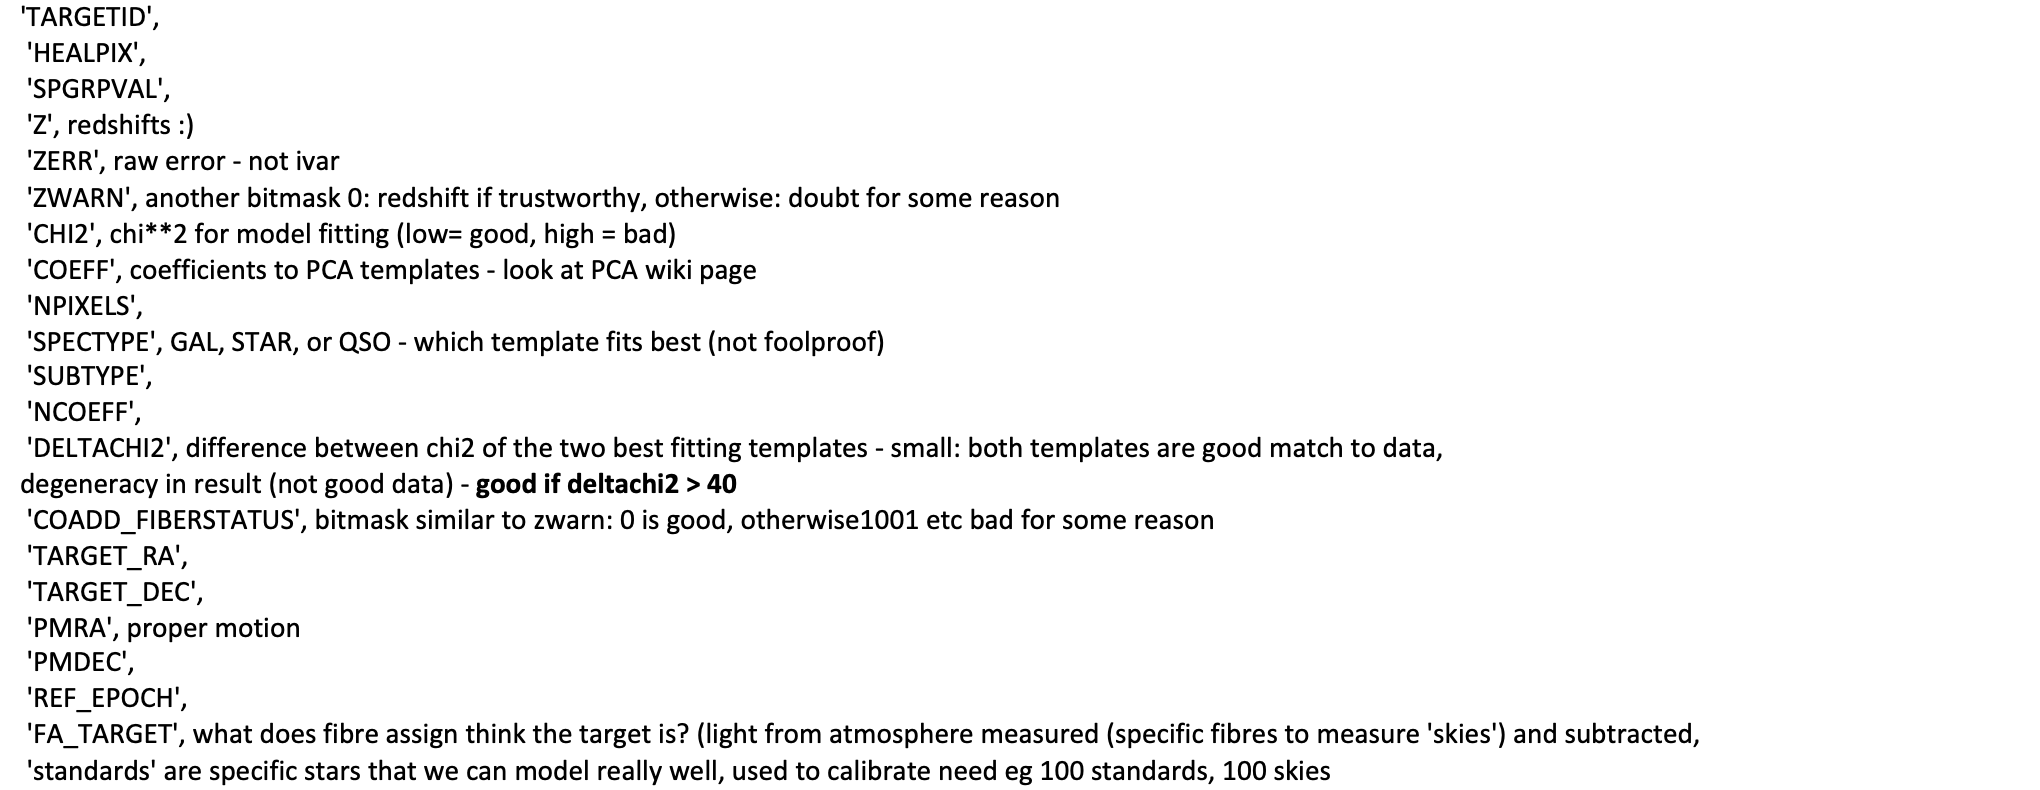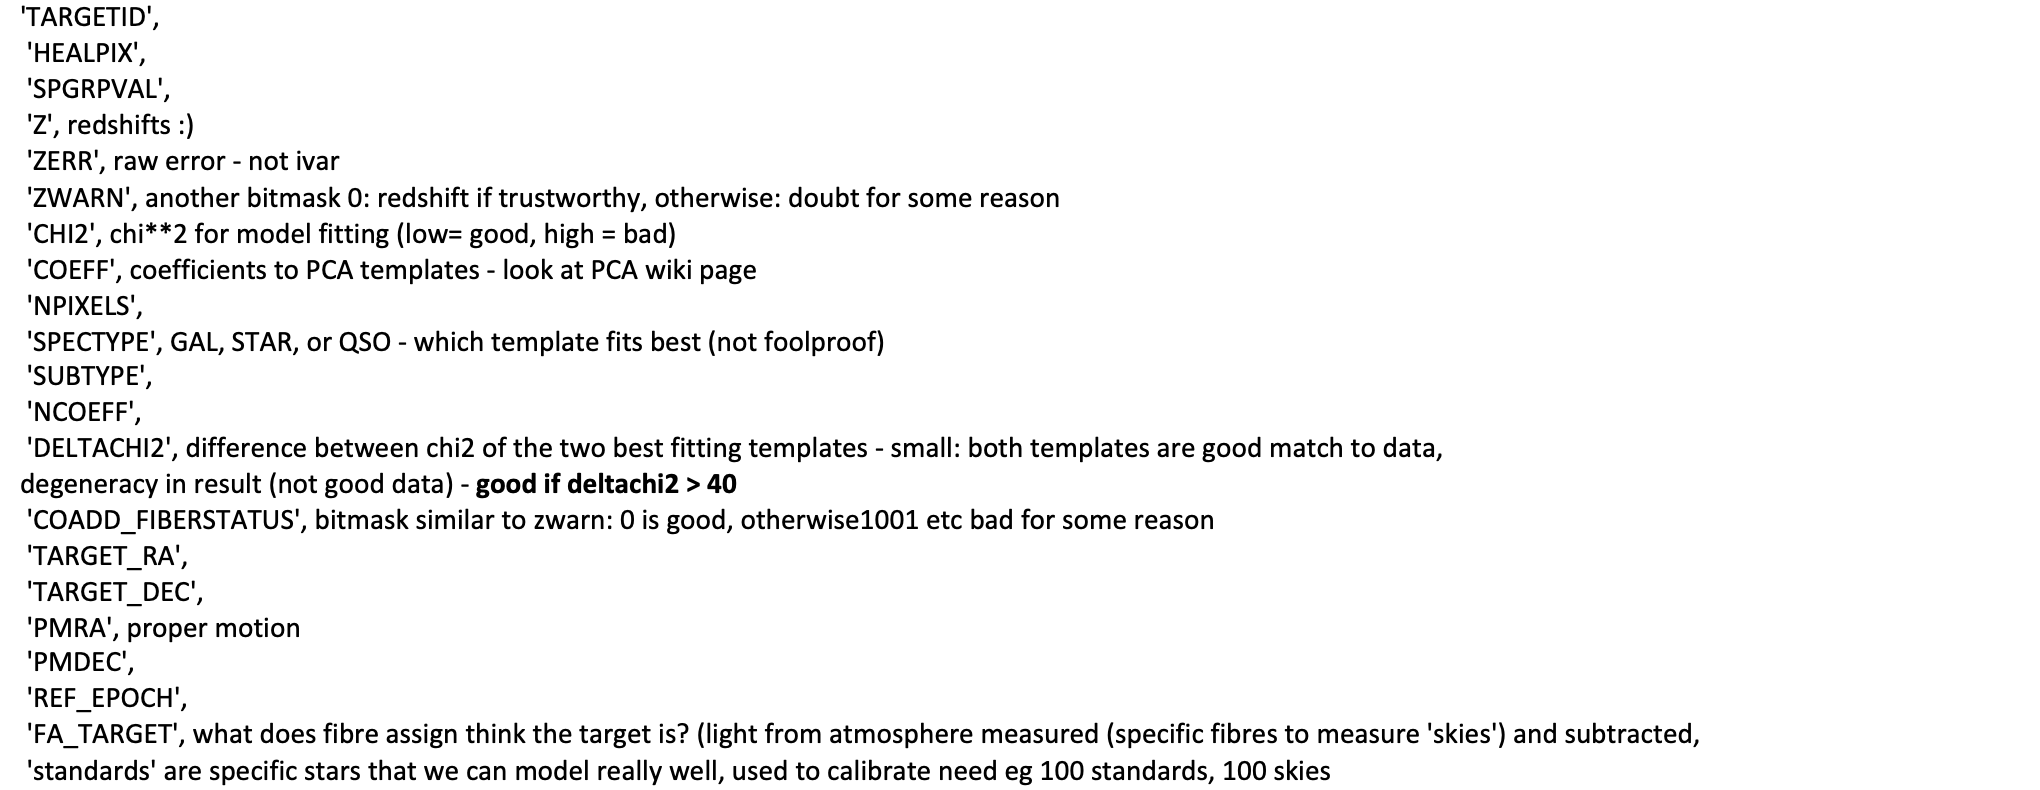

Getting to grips with bitmasks: see https://github.com/desihub/desitarget/blob/main/doc/nb/target-selection-bits-and-bitmasks.ipynb

In [23]:
from desitarget.targets import desi_mask, bgs_mask, mws_mask
from desitarget.targetmask import zwarn_mask

In [24]:
print('Indices of BGS_ANY in DESI_TARGET', np.where((data["DESI_TARGET"] & desi_mask["BGS_ANY"]) != 0)[0])
bgs_bright_i = np.where((data["BGS_TARGET"] & bgs_mask["BGS_BRIGHT"]) != 0)[0]
print('Indices of BGS_BRIGHT:', bgs_bright_i)
bgs_faint_i = np.where((data["BGS_TARGET"] & bgs_mask["BGS_FAINT"]) != 0)[0]
print('Indices of BGS_FAINT:', bgs_faint_i)
mws_i = np.where((data["MWS_TARGET"]))[0]
print('Indices of MWS:', mws_i)

Indices of BGS_ANY in DESI_TARGET [      0       2       3 ... 1693742 1693746 1693747]
Indices of BGS_BRIGHT: [      0       2       7 ... 1693741 1693742 1693746]
Indices of BGS_FAINT: [      3      10      17 ... 1693725 1693732 1693747]
Indices of MWS: [      1       6      12 ... 1693729 1693743 1693744]


In [25]:
names = desi_mask.names()
bitnums = [desi_mask.bitnum(name) for name in names]
bitvals = [desi_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # List of DESI bitmasks

[('LRG', 0, 1),
 ('ELG', 1, 2),
 ('QSO', 2, 4),
 ('QSO_HIZ', 4, 16),
 ('ELG_LOP', 5, 32),
 ('ELG_HIP', 6, 64),
 ('ELG_VLO', 7, 128),
 ('LRG_NORTH', 8, 256),
 ('ELG_NORTH', 9, 512),
 ('QSO_NORTH', 10, 1024),
 ('ELG_LOP_NORTH', 11, 2048),
 ('ELG_VLO_NORTH', 12, 4096),
 ('LRG_SOUTH', 16, 65536),
 ('ELG_SOUTH', 17, 131072),
 ('QSO_SOUTH', 18, 262144),
 ('ELG_LOP_SOUTH', 19, 524288),
 ('ELG_VLO_SOUTH', 20, 1048576),
 ('SKY', 32, 4294967296),
 ('STD_FAINT', 33, 8589934592),
 ('STD_WD', 34, 17179869184),
 ('STD_BRIGHT', 35, 34359738368),
 ('BAD_SKY', 36, 68719476736),
 ('SUPP_SKY', 37, 137438953472),
 ('NO_TARGET', 49, 562949953421312),
 ('BRIGHT_OBJECT', 50, 1125899906842624),
 ('IN_BRIGHT_OBJECT', 51, 2251799813685248),
 ('NEAR_BRIGHT_OBJECT', 52, 4503599627370496),
 ('BGS_ANY', 60, 1152921504606846976),
 ('MWS_ANY', 61, 2305843009213693952),
 ('SCND_ANY', 62, 4611686018427387904)]

In [26]:
names = bgs_mask.names()
bitnums = [bgs_mask.bitnum(name) for name in names]
bitvals = [bgs_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # List of BGS bitmasks

[('BGS_FAINT', 0, 1),
 ('BGS_BRIGHT', 1, 2),
 ('BGS_WISE', 2, 4),
 ('BGS_FAINT_HIP', 3, 8),
 ('BGS_FAINT_NORTH', 8, 256),
 ('BGS_BRIGHT_NORTH', 9, 512),
 ('BGS_WISE_NORTH', 10, 1024),
 ('BGS_FAINT_SOUTH', 16, 65536),
 ('BGS_BRIGHT_SOUTH', 17, 131072),
 ('BGS_WISE_SOUTH', 18, 262144)]

In [27]:
names = mws_mask.names()
bitnums = [mws_mask.bitnum(name) for name in names]
bitvals = [mws_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # List of MWS bitmasks

[('MWS_BROAD', 0, 1),
 ('MWS_WD', 1, 2),
 ('MWS_NEARBY', 2, 4),
 ('MWS_BROAD_NORTH', 4, 16),
 ('MWS_BROAD_SOUTH', 5, 32),
 ('MWS_BHB', 6, 64),
 ('MWS_MAIN_BLUE', 8, 256),
 ('MWS_MAIN_BLUE_NORTH', 9, 512),
 ('MWS_MAIN_BLUE_SOUTH', 10, 1024),
 ('MWS_MAIN_RED', 11, 2048),
 ('MWS_MAIN_RED_NORTH', 12, 4096),
 ('MWS_MAIN_RED_SOUTH', 13, 8192),
 ('MWS_FAINT_BLUE', 14, 16384),
 ('MWS_FAINT_BLUE_NORTH', 15, 32768),
 ('MWS_FAINT_BLUE_SOUTH', 16, 65536),
 ('MWS_FAINT_RED', 17, 131072),
 ('MWS_FAINT_RED_NORTH', 18, 262144),
 ('MWS_FAINT_RED_SOUTH', 19, 524288),
 ('GAIA_STD_FAINT', 33, 8589934592),
 ('GAIA_STD_WD', 34, 17179869184),
 ('GAIA_STD_BRIGHT', 35, 34359738368),
 ('BACKUP_GIANT_LOP', 58, 288230376151711744),
 ('BACKUP_GIANT', 59, 576460752303423488),
 ('BACKUP_BRIGHT', 60, 1152921504606846976),
 ('BACKUP_FAINT', 61, 2305843009213693952),
 ('BACKUP_VERY_FAINT', 62, 4611686018427387904)]

In [29]:
names = zwarn_mask.names()
bitnums = [zwarn_mask.bitnum(name) for name in names]
bitvals = [zwarn_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # List of ZWARN bitmasks

[('SKY', 0, 1),
 ('LITTLE_COVERAGE', 1, 2),
 ('SMALL_DELTA_CHI2', 2, 4),
 ('NEGATIVE_MODEL', 3, 8),
 ('MANY_OUTLIERS', 4, 16),
 ('Z_FITLIMIT', 5, 32),
 ('NEGATIVE_EMISSION', 6, 64),
 ('UNPLUGGED', 7, 128),
 ('BAD_TARGET', 8, 256),
 ('NODATA', 9, 512),
 ('BAD_MINFIT', 10, 1024),
 ('POORDATA', 11, 2048),
 ('LOW_DEL_CHI2', 16, 65536),
 ('LOW_DEL_CHI2_BGS', 17, 131072),
 ('BAD_SPECQA', 18, 262144),
 ('BAD_PETALQA', 19, 524288)]

In [30]:
zwarn_mask.names(2053)

['SKY', 'SMALL_DELTA_CHI2', 'POORDATA']

In [28]:
print(np.where(data['BGS_TARGET'] & zwarn_mask['SKY'] != 0)[0])
print(np.where(data['BGS_TARGET'] & zwarn_mask['LITTLE_COVERAGE'] != 0)[0])

[      3      10      17 ... 1693725 1693732 1693747]
[      0       2       7 ... 1693741 1693742 1693746]


In [34]:
data_BGS = Table()
data_BGS_faint = Table()
from desiutil.dust import mwdust_transmission as mwdust

In [35]:
data['PHOTSYS'] = np.array(data['PHOTSYS'],dtype='U4')
print(np.array(data['PHOTSYS']))

['N' 'N' 'N' ... 'N' '' '']


In [36]:
def clip_flux(flux_col):
    i = np.where(flux_col < 10**-16)[0]
    flux_col[i] = 10**-16
    return flux_col

In [37]:
data['MW_TRANSMISSION_R'] = float(0.0) # Creating empty columns for later use
data['MW_TRANSMISSION_G'] = float(0.0)
data['MW_TRANSMISSION_Z'] = float(0.0)
data['MW_TRANSMISSION_W1'] = float(0.0)
data['G_MAG'] = float(0.0)
data['R_MAG'] = float(0.0)
data['Z_MAG'] = float(0.0)
data['W1_MAG'] = float(0.0)
data['R_FIBER_MAG'] = float(0.0)
data['R_RAW_MAG'] = float(0.0)

In [39]:
photsys_valid = np.where(np.logical_or(data['PHOTSYS']=='N',data['PHOTSYS']=='S',data['PHOTSYS']=='G'))[0] # Removes sky targets
# Calculate MW Transmission from EBV values
data['MW_TRANSMISSION_R'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'R', data['PHOTSYS'][photsys_valid])
data['MW_TRANSMISSION_G'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'G', data['PHOTSYS'][photsys_valid]) 
data['MW_TRANSMISSION_Z'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'Z', data['PHOTSYS'][photsys_valid]) 
data['MW_TRANSMISSION_W1'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'W1', data['PHOTSYS'][photsys_valid]) 

In [40]:
# Creating new table named data_BGS containing only BGS BRIGHT targets
data_BGS['RA'] = data['TARGET_RA'][bgs_bright_i]
data_BGS['DEC'] = data['TARGET_DEC'][bgs_bright_i]

data_BGS['Z'] = data['Z'][bgs_bright_i]
data_BGS['DELTACHI2'] = data['DELTACHI2'][bgs_bright_i]
data_BGS['ZWARN'] = data['ZWARN'][bgs_bright_i]

data_BGS['FLUX_G'] = clip_flux(data['FLUX_G'][bgs_bright_i])
data_BGS['FLUX_R'] = clip_flux(data['FLUX_R'][bgs_bright_i])
data_BGS['FLUX_Z'] = clip_flux(data['FLUX_Z'][bgs_bright_i])
data_BGS['FLUX_W1'] = clip_flux(data['FLUX_W1'][bgs_bright_i])
data_BGS['FIBERFLUX_R'] = clip_flux(data['FIBERFLUX_R'][bgs_bright_i])
data_BGS['GAIA_PHOT_G_MEAN_MAG'] = data['GAIA_PHOT_G_MEAN_MAG'][bgs_bright_i]

data_BGS['EBV'] = data['EBV'][bgs_bright_i]
data_BGS['PHOTSYS'] = np.array(data['PHOTSYS'][bgs_bright_i],dtype='U4')

data_BGS['MW_TRANSMISSION_R'] = mwdust(data_BGS['EBV'], 'R', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_G'] = mwdust(data_BGS['EBV'], 'G', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_Z'] = mwdust(data_BGS['EBV'], 'Z', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_W1'] = mwdust(data_BGS['EBV'], 'W1', data_BGS['PHOTSYS']) 

data_BGS #BGS BRIGHT

RA,DEC,Z,DELTACHI2,ZWARN,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FIBERFLUX_R,GAIA_PHOT_G_MEAN_MAG,EBV,PHOTSYS,MW_TRANSMISSION_R,MW_TRANSMISSION_G,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1
float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,str4,float64,float64,float64,float64
252.92687803206968,46.536735591055674,0.03768131081242892,2130.768586933613,0,15.28663,21.711166,26.56284,14.621476,5.539733,0.0,0.019520197,N,0.961633563041687,0.9431076645851135,0.9786741137504578,0.9966973662376404
253.3883175890437,46.13916021306366,0.2460835153758476,82.70370354130864,0,5.4663215,15.62286,30.758135,37.486607,3.26027,0.0,0.018015157,N,0.96453857421875,0.9473766088485718,0.980302095413208,0.9969516396522522
253.51463336528474,46.09234093377972,0.18949029199260112,569.461139768362,0,11.675276,26.277279,45.331238,41.163414,10.669796,0.0,0.017417613,N,0.9656943678855896,0.9490768313407898,0.9809491634368896,0.9970526099205017
253.4956175039726,46.15739279117302,0.13372067018843709,3981.04279499501,0,80.86853,209.48013,385.7725,341.62036,63.781494,18.48371,0.017567316,N,0.9654046893119812,0.948650598526001,0.9807870388031006,0.9970272779464722
253.41223584682092,46.17320751334843,0.45165661725352163,433.8810201063752,0,11.191165,34.252174,67.620674,109.840805,7.526166,0.0,0.018026156,N,0.9645172953605652,0.9473453164100647,0.9802901744842529,0.9969497919082642
253.57217994384067,46.09795214905402,0.270682916567217,298.5191029217094,0,4.480545,18.680002,38.422207,48.663876,9.283437,0.0,0.017021973,N,0.9664604067802429,0.9502042531967163,0.981377899646759,0.9971194267272949
253.55885640223556,46.223840981883576,0.07647416383063638,1410.7242206037045,0,25.689669,43.492794,63.73545,45.247345,9.872389,0.0,0.017612023,N,0.9653182029724121,0.9485233426094055,0.980738639831543,0.9970197081565857
253.5639598213845,46.233230791757805,0.03687310531300927,2077.76135228388,0,66.705185,109.13154,151.53752,95.64898,10.190221,0.0,0.017700506,N,0.9651470184326172,0.9482715129852295,0.9806427955627441,0.9970048069953918
253.46611522066826,46.14318099327844,0.04559773969242534,3192.7016885225894,0,34.108765,54.27098,72.09357,45.54539,8.416039,0.0,0.017656086,N,0.9652329683303833,0.9483979344367981,0.9806908965110779,0.9970123171806335


In [41]:
# Creating new table named data_BGS_faint containing only BGS Faint targets
print(bgs_faint_i[0:100])
data_BGS_faint['RA'] = data['TARGET_RA'][bgs_faint_i]
data_BGS_faint['DEC'] = data['TARGET_DEC'][bgs_faint_i]

data_BGS_faint['Z'] = data['Z'][bgs_faint_i]
data_BGS_faint['DELTACHI2'] = data['DELTACHI2'][bgs_faint_i]
data_BGS_faint['ZWARN'] = data['ZWARN'][bgs_faint_i]

data_BGS_faint['FLUX_G'] = clip_flux(data['FLUX_G'][bgs_faint_i])
data_BGS_faint['FLUX_R'] = clip_flux(data['FLUX_R'][bgs_faint_i])
data_BGS_faint['FLUX_Z'] = clip_flux(data['FLUX_Z'][bgs_faint_i])
data_BGS_faint['FLUX_W1'] = clip_flux(data['FLUX_W1'][bgs_faint_i])
data_BGS_faint['FIBERFLUX_R'] = clip_flux(data['FIBERFLUX_R'][bgs_faint_i])
data_BGS_faint['GAIA_PHOT_G_MEAN_MAG'] = data['GAIA_PHOT_G_MEAN_MAG'][bgs_faint_i]

data_BGS_faint['EBV'] = data['EBV'][bgs_faint_i]
data_BGS_faint['PHOTSYS'] = np.array(data['PHOTSYS'][bgs_faint_i],dtype='U4')

data_BGS_faint['MW_TRANSMISSION_R'] = mwdust(data_BGS_faint['EBV'], 'R', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_G'] = mwdust(data_BGS_faint['EBV'], 'G', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_Z'] = mwdust(data_BGS_faint['EBV'], 'Z', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_W1'] = mwdust(data_BGS_faint['EBV'], 'W1', data_BGS_faint['PHOTSYS']) 

data_BGS_faint

[  3  10  17  33  37  39  47  48  61  66  67  85  89  96 101 103 109 111
 120 122 124 132 139 140 149 159 165 182 190 200 203 207 209 213 216 219
 225 231 232 237 240 247 250 251 259 261 262 265 268 270 282 284 295 303
 306 308 314 324 326 331 344 350 351 354 357 359 369 390 391 394 397 399
 400 402 406 418 426 437 445 447 451 454 456 460 463 467 471 484 488 499
 504 508 513 519 520 543 553 556 557 563]


RA,DEC,Z,DELTACHI2,ZWARN,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FIBERFLUX_R,GAIA_PHOT_G_MEAN_MAG,EBV,PHOTSYS,MW_TRANSMISSION_R,MW_TRANSMISSION_G,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1
float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,str4,float64,float64,float64,float64
253.61567395297553,46.22384832111727,0.3648354644541231,156.26672565937042,0,5.7944336,14.67982,28.79129,87.14686,2.5959828,0.0,0.018253785,N,0.9640774130821228,0.9466984272003174,0.9800437688827515,0.9969112873077393
253.51457117096697,46.215863929344884,0.21685492212078814,2145.1981295347214,0,4.631336,10.276979,19.109667,26.697212,5.5397086,0.0,0.0174425,N,0.9656462073326111,0.9490059614181519,0.9809222221374512,0.9970483779907227
253.48589683818622,46.269581837842615,0.3649589127543193,200.64442791044712,0,2.6706824,7.8994045,17.396439,28.601995,3.265721,0.0,0.017372267,N,0.9657821655273438,0.9492059946060181,0.9809983372688293,0.997060239315033
254.40110516374057,46.57091346807357,0.2167515693987101,1874.2445800304413,0,6.2829924,10.712455,15.003787,11.248343,4.664464,0.0,0.022258606,N,0.9563703536987305,0.9353896975517273,0.9757190346717834,0.9962349534034729
254.35883189816587,46.63786775384007,0.46190874997008885,1066.1913056373596,0,3.6798258,9.189275,16.169027,25.059845,3.970422,0.0,0.025840731,N,0.9495289921760559,0.9253890514373779,0.9718669056892395,0.9956303238868713
254.22461371970707,46.62270185456701,5.0616854166023114e-05,23579.10492533642,0,2.6882198,13.36266,61.471287,76.54661,10.387491,0.0,0.02481886,N,0.9514756202697754,0.9282310009002686,0.9729642271995544,0.9958027601242065
254.26085823639045,46.55800408072675,0.23231386968387802,532.729374051094,0,5.728754,13.419539,22.875435,21.69198,5.3062315,0.0,0.022517882,N,0.9558735489845276,0.9346622228622437,0.9754396677017212,0.996191143989563
254.24140184850756,46.64697957308354,0.3843807023738926,3021.5231380462646,0,5.837717,12.042456,17.971205,17.71818,3.954253,0.0,0.026150038,N,0.9489405751228333,0.924530565738678,0.9715349674224854,0.9955781698226929
254.2442320901141,46.80769670827801,0.38542549086303113,312.7655062377453,0,4.475873,9.37912,14.720773,22.071201,3.231239,0.0,0.032713264,N,0.9365400671958923,0.9065005779266357,0.9645188450813293,0.9944714307785034


In [42]:
# Indices of 'good' and 'bad' redshifts
z_bad_bright = np.where((np.logical_or(data_BGS['ZWARN']!=0, data_BGS['DELTACHI2']<=40)))[0]
z_bad_faint = np.where(np.logical_or(data_BGS_faint['ZWARN']!=0, data_BGS_faint['DELTACHI2']<=40))[0]

z_good_bright = np.where(np.logical_and(data_BGS['ZWARN']==0, data_BGS['DELTACHI2']>40))[0]
z_good_faint = np.where(np.logical_and(data_BGS_faint['ZWARN']==0, data_BGS_faint['DELTACHI2']>40))[0]

print(z_good_faint)

[     0      1      2 ... 275805 275806 275809]


**DESI uses nanomaggies: m = 22.5 - 2.5log10(flux/mw_transmission)**

flux: total flux

fibreflux: fraction of light on fibre (estimate)

In [43]:
# Calculating apparent magnitudes in different bands using nanomaggie formula, for each data set

data_BGS['R_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R']/data_BGS['MW_TRANSMISSION_R']))
data_BGS['G_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_G']/data_BGS['MW_TRANSMISSION_G']))
data_BGS['Z_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_Z']/data_BGS['MW_TRANSMISSION_Z']))
data_BGS['W1_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_W1']/data_BGS['MW_TRANSMISSION_W1']))
data_BGS['R_FIBER_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FIBERFLUX_R']/data_BGS['MW_TRANSMISSION_R'])) 

data_BGS_faint['R_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_R']/data_BGS_faint['MW_TRANSMISSION_R']))
data_BGS_faint['G_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_G']/data_BGS_faint['MW_TRANSMISSION_G']))
data_BGS_faint['Z_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_Z']/data_BGS_faint['MW_TRANSMISSION_Z']))
data_BGS_faint['W1_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_W1']/data_BGS_faint['MW_TRANSMISSION_W1']))
data_BGS_faint['R_FIBER_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FIBERFLUX_R']/data_BGS_faint['MW_TRANSMISSION_R'])) 
             
data['G_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_G'][photsys_valid])/data['MW_TRANSMISSION_G'][photsys_valid]))
data['R_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_R'][photsys_valid])/data['MW_TRANSMISSION_R'][photsys_valid]))
data['R_RAW_MAG'] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_R'])))
data['Z_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_Z'][photsys_valid])/data['MW_TRANSMISSION_Z'][photsys_valid]))
data['W1_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_W1'][photsys_valid])/data['MW_TRANSMISSION_W1'][photsys_valid]))
data['R_FIBER_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FIBERFLUX_R'][photsys_valid]/data['MW_TRANSMISSION_R'][photsys_valid])))

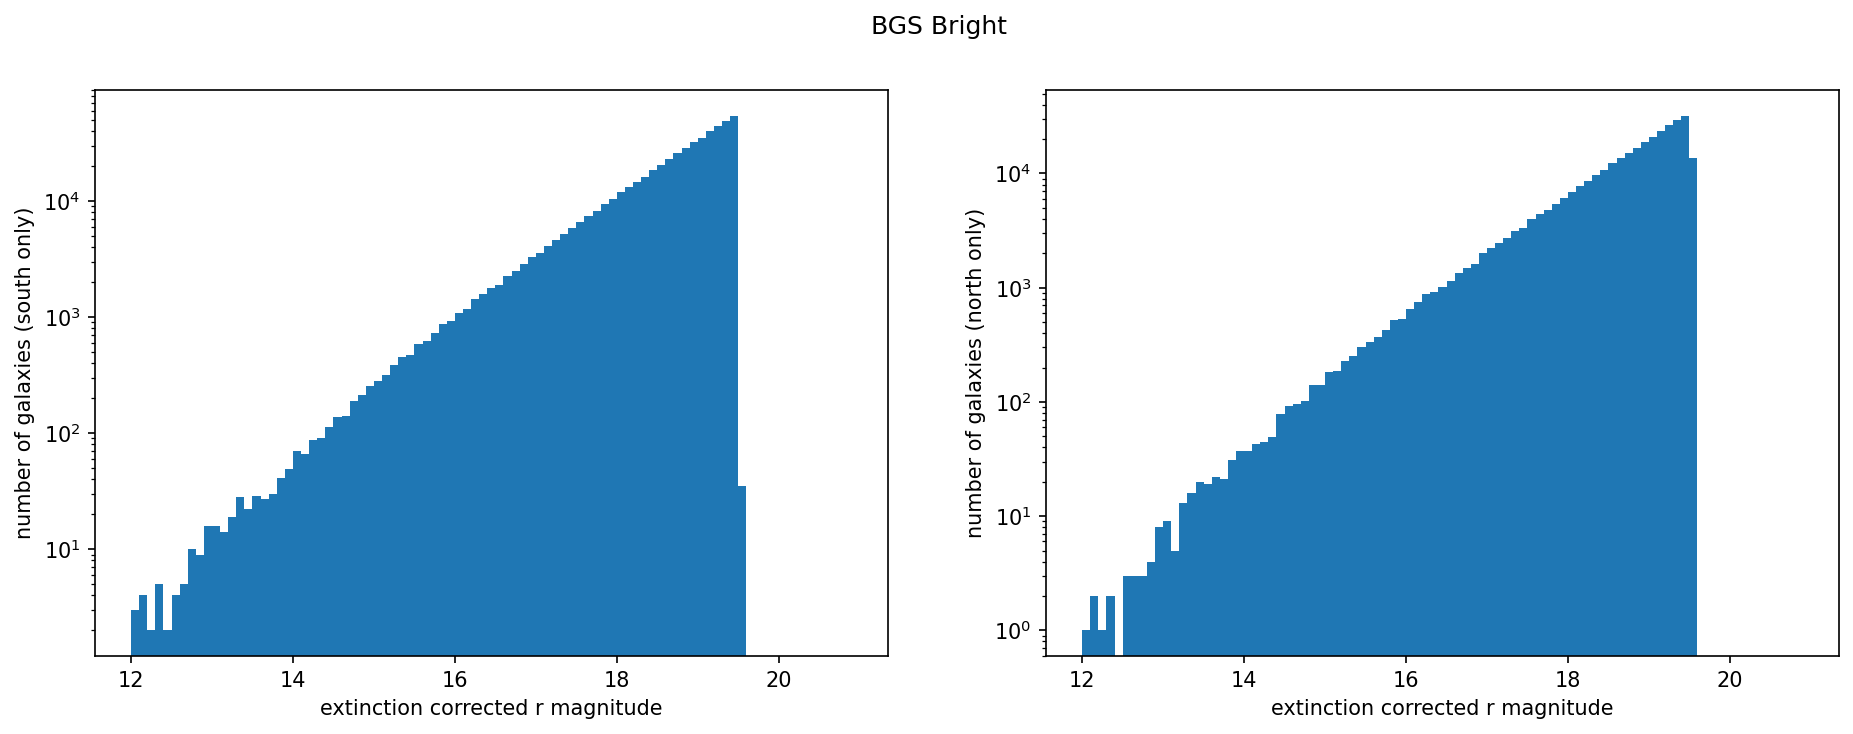

In [46]:
S = np.where(data_BGS['PHOTSYS']=='S')[0] # Indices of S targets
N = np.where(data_BGS['PHOTSYS']=='N')[0] # Indices of N targets
r_magnitude_s = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R'][S]/data_BGS['MW_TRANSMISSION_R'][S]))
r_magnitude_n = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R'][N]/data_BGS['MW_TRANSMISSION_R'][N]))
plt.figure(figsize=(15,5),dpi=150)
plt.suptitle('BGS Bright')
ax1 = plt.subplot(121)
ax1.hist(r_magnitude_s,bins=np.arange(12,21,0.1))
plt.xlabel('extinction corrected r magnitude')
plt.ylabel('number of galaxies (south only)')
ax1.set_yscale('log')
ax2 = plt.subplot(122)
ax2.hist(r_magnitude_n,bins=np.arange(12,21,0.1))
plt.xlabel('extinction corrected r magnitude')
plt.ylabel('number of galaxies (north only)')
ax2.set_yscale('log')
plt.show()

(840503,)


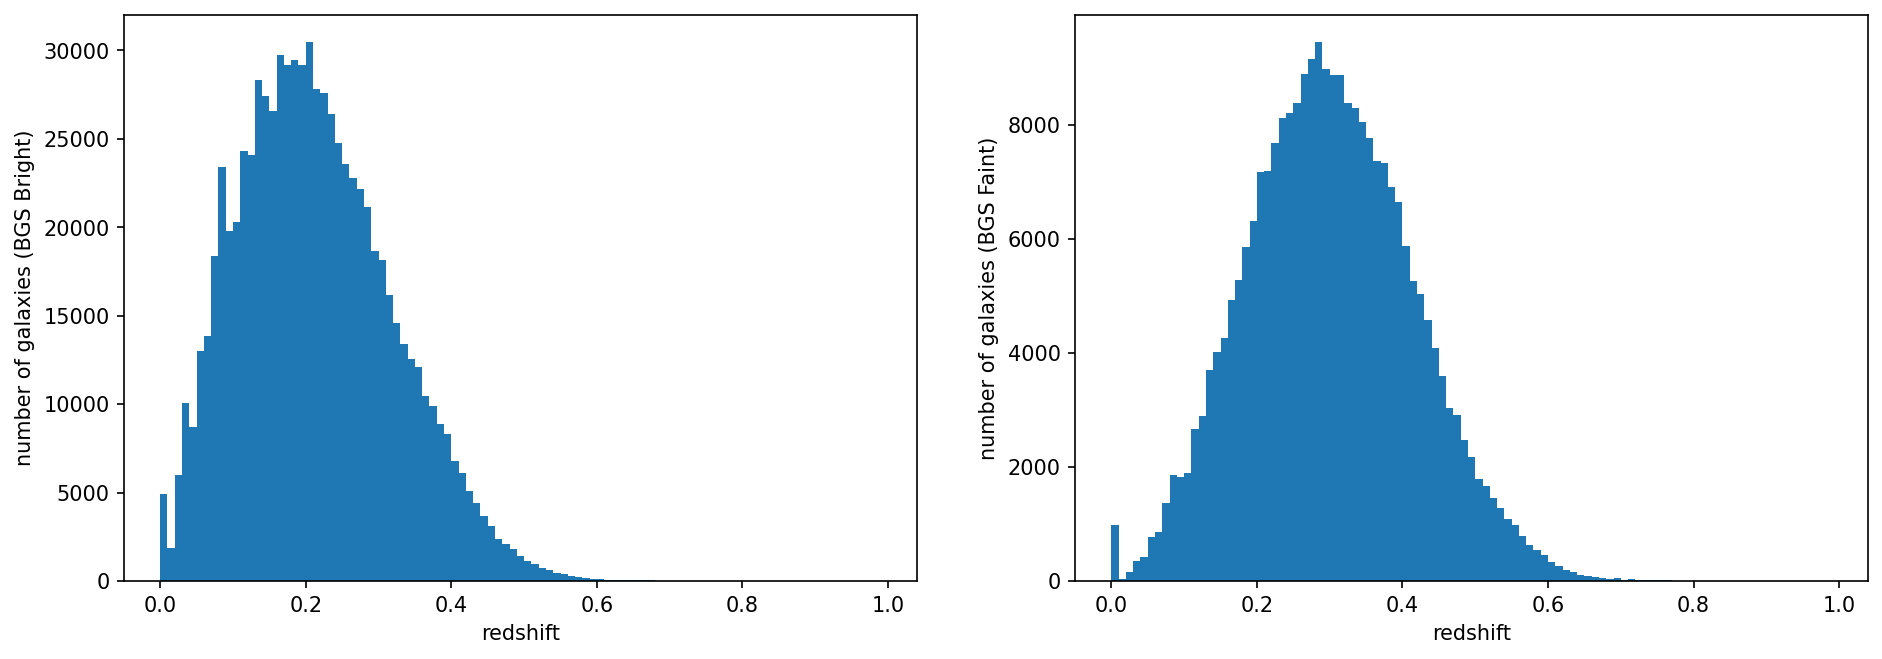

In [47]:
print(np.shape(data_BGS['Z']))
plt.figure(figsize=(15,5),dpi=150)
#plt.suptitle('BGS Bright')
ax1 = plt.subplot(121)
ax1.hist(data_BGS['Z'][z_good_bright], bins=np.arange(0,1,0.01))
plt.xlabel('redshift')
plt.ylabel('number of galaxies (BGS Bright)')
#ax1.set_yscale('log')
ax2 = plt.subplot(122)
ax2.hist(data_BGS_faint['Z'][z_good_faint], bins=np.arange(0,1,0.01))
plt.xlabel('redshift')
plt.ylabel('number of galaxies (BGS Faint)')
#ax2.set_yscale('log')
plt.show()

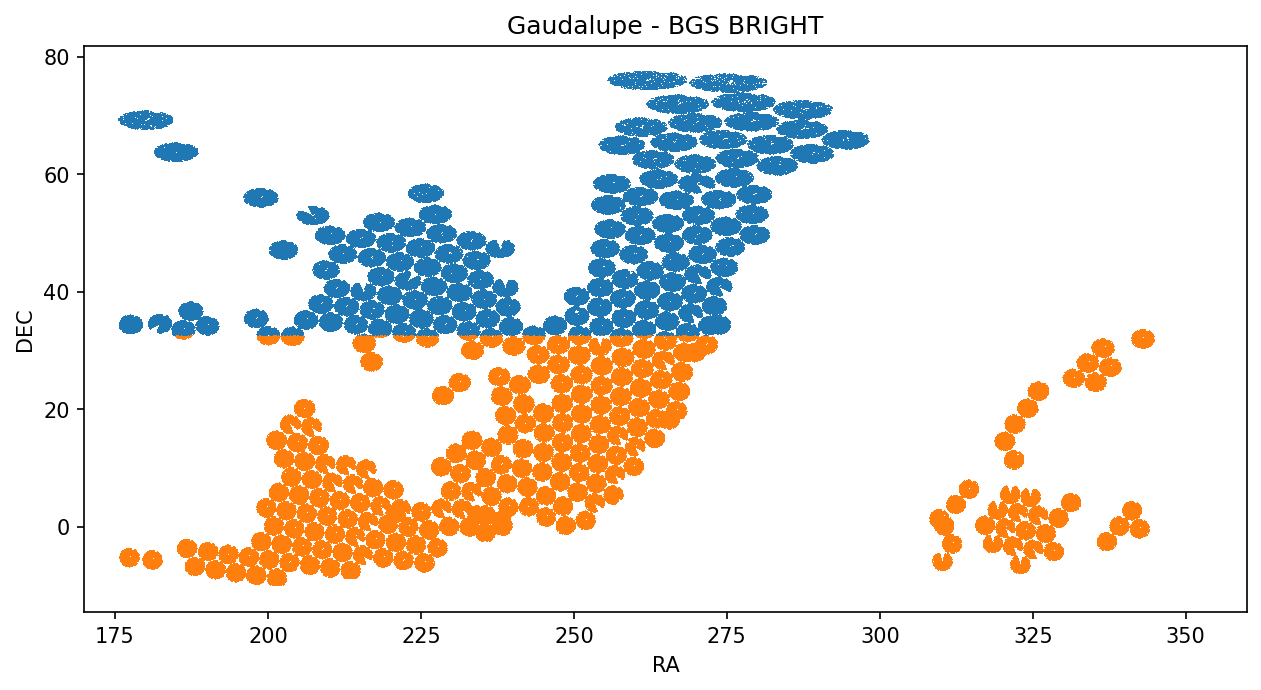

In [58]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(data_BGS['RA'][N], data_BGS['DEC'][N], lw=0.0, marker=',', zorder=0)
plt.plot(data_BGS['RA'][S], data_BGS['DEC'][S], lw=0.0, marker=',', zorder=0)
plt.xlim(170,360)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Gaudalupe - BGS BRIGHT')
plt.show()